<a href="https://colab.research.google.com/github/evgeniytr1509/HW_DS_10/blob/main/DS_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical

# Загрузка данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Преобразование данных и масштабирование
x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=-1))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=-1))
x_train = tf.image.resize(x_train, (32, 32))  # Размеры входных изображений VGG16, чем больше размер изображений тем больше время обучения модели и тем выше точность.
x_test = tf.image.resize(x_test, (32, 32))
x_train = tf.keras.applications.vgg16.preprocess_input(x_train)
x_test = tf.keras.applications.vgg16.preprocess_input(x_test)

# Преобразование меток в формат one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Загрузка VGG16
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Заморозка весов сверточной базы
conv_base.trainable = False

# Создание модели
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
750/750 [==============================] - 788s 1s/step - loss: 5.6145 - accuracy: 0.5682 - val_loss: 1.1524 - val_accuracy: 0.7779
Epoch 2/10
750/750 [==============================] - 783s 1s/step - loss: 1.4188 - accuracy: 0.7044 - val_loss: 0.7330 - val_accuracy: 0.7963
Epoch 3/10
750/750 [==============================] - 718s 958ms/step - loss: 0.9379 - accuracy: 0.7447 - val_loss: 0.6368 - val_accuracy: 0.8087
Epoch 4/10
750/750 [==============================] - 784s 1s/step - loss: 0.7784 - accuracy: 0.7736 - val_loss: 0.5954 - val_accuracy: 0.8198
Epoch 5/10
750/750 [==============================] - 715s 954ms/step - loss: 0.7016 - accuracy: 0.7880 - val_loss: 0.5672 - val_accuracy: 0.8287
Epoch 6/10
750/750 [==============================] - 779s 1s/step - loss: 0.6470 - accuracy: 0.8014 - val_loss: 0.5512 - val_accuracy: 0.8347
Epoch 7/10
750/750 [==============================] - 782s 1s/step - loss: 0.6167 - accuracy: 0.8112 - val_loss: 0.5400 - val_accuracy: 

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


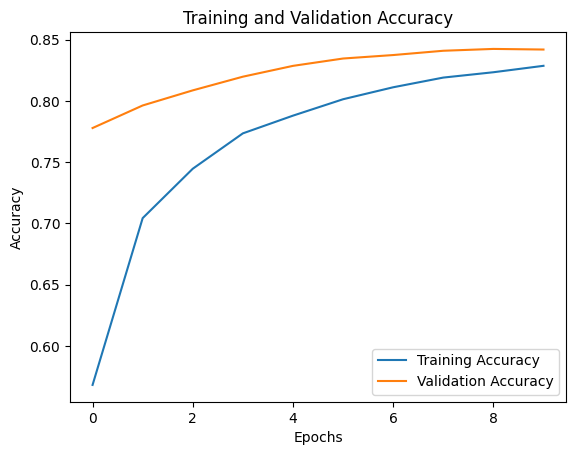

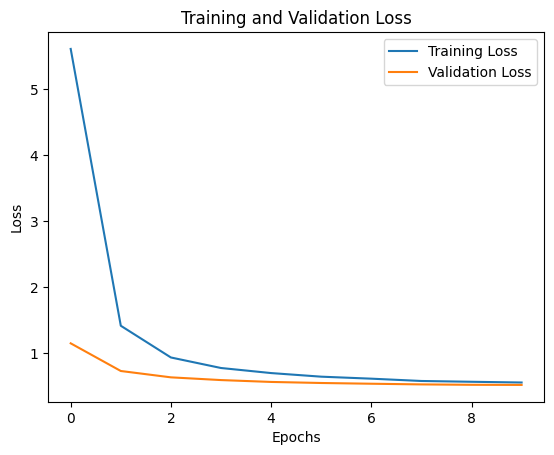

In [26]:
import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# График потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Вывод 1: На графике 1 наблюдается увеличение точности на тренировочном наборе данных в процессе обучения модели. Если точность снижается, это свидетельствует о переобучении.

Вывод 2: На графике 2 наблюдается снижение потерь на тренировочном наборе данных в процессе обучения модели. Если потери увеличиваются, это свидетельствует о переобучении.


Общий вывод сравнения параметров нейросетей:
Часть 1:
Время обучения 40 минут.
Total params: 412 778 (1.57 MB)
Trainable params: 412 778 (1.57 MB)
Non-trainable params: 0 (0.00 Byte)

Часть 2:
Время обучения 150 минут.
Total params: 1 484 8586 (56.64 MB)
Trainable params: 133 898 (523.04 KB)
Non-trainable params: 14 714 688 (56.13 MB)

Общее количество параметров второй модели значительно больше, чем в первой. Это может быть связано с более сложной архитектурой модели.

У первой модели все параметры являются обучаемыми, тогда как у второй модели большая часть параметров является  предварительно обученными моделями, такими как VGG16.

Вторая модель обучается дольше по нескольким причинам:
1. Общее количество параметров:
У второй модели гораздо больше параметров (14 848 586) по сравнению с первой (412 778). Это означает, что вторая модель обладает более сложной архитектурой, что приводит к большему объему вычислений. Большее количество параметров требует больше времени на вычисление.

2. Обучаемые параметры:
Хотя у второй модели количество обучаемых параметров (133,898) меньше, чем у первой модели (412,778), сложность модели всё равно остается высокой из-за предварительно обученных весов сверточной базы (VGG16). Обучение большого количества параметров может быть более затратным по времени.

3. Сложность операций:
Вторая модель может выполнять более сложные операции в связи с ее более глубокой архитектурой. Это требует больше вычислительных ресурсов и времени для каждой эпохи обучения.

Для ускорения обучение второй модели, можно рассмотреть следующие подходы:

Использование более мощного аппаратного обеспечения (CPU, GPU, ОЗУ).
Уменьшение размера модели, уменьшение размера изображений, однако при этом уменьшается точность модели.

 Для выбора оптимального балланса между сложностью модели и временем обучения следует учитывать конкретные требования технического задания и имеющиеся ресурсы.